## Limits of diversification


Almost by definition, one cannot diversify away _systematic risk_. In this case, hedging is the only effective way to obtain downside protection. However, obtaining this protection also affects your benefits and hedging requires a lot of money. So, is there something in between?

The answer is **insurance**, which is also called **dynamic hedging**.

In [55]:
%load_ext autoreload
%autoreload 2

import edhec_risk_kit as erk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


For this notebook we will use two extra files with the 30 Industry Portfolio market sizes (all sum 100) and the number of firms each industry is composed of.

In [2]:
ind_return = erk.get_ind_returns()
ind_size = erk.get_ind_size()
ind_nfirms = erk.get_ind_firms()

What we will do now is calculate the market cap of each industry and the total.

In [3]:
ind_mktcap = ind_nfirms * ind_size

total_mktcap = ind_mktcap.sum(axis="columns") #we sum the market cap of all industries

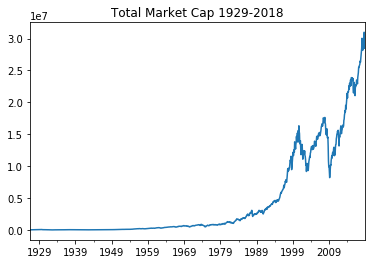

In [4]:
total_mktcap.plot(title="Total Market Cap 1929-2018")

What we can do now is calculate the weight, or percentage of each industry on the total market cap:

In [5]:
ind_capweight = ind_mktcap.divide(total_mktcap,axis="rows")

Let's compare now how two industries market caps have changed with time:

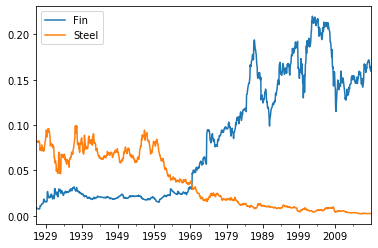

In [6]:
ind_capweight[["Fin","Steel"]].plot()

So steel industry has become much less important over time. On the contrary, finance industry market cap has developed tremendously.

Let's now calculate the total market return, which is a weighted average of the industries returns, where the weights are given by their corresponding market caps.

In [7]:
total_market_return = (ind_capweight*ind_return).sum(axis="columns")

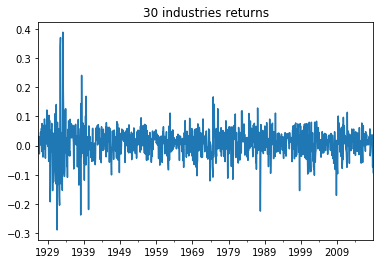

In [8]:
total_market_return.plot(title="30 industries returns")

Let's find now the wealth index, for the period 1929-2018, had we invested 1000 dollars:



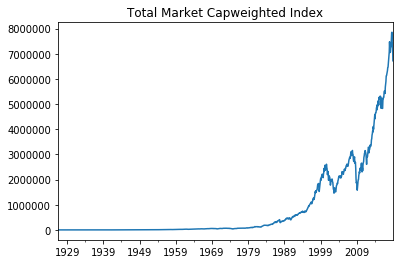

In [9]:
total_market_draw = erk.drawdown(total_market_return)

total_market_draw["Wealth"].plot(title="Total Market Capweighted Index")

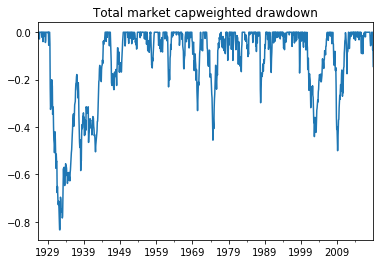

In [10]:
total_market_draw["Drawdown"].plot(title="Total market capweighted drawdown")

Now let's focus on the index from 1980. Apart from plotting the monthly index, we will plot the **moving average** taking a period of 36 months. This means that in the month 36+n we will plot the average of the index from period n to 36+n (so the first point will be on the 36th month). In order to do this, we have to use the function rolling, set the window (i.e. the period of averaging) and calculate the mean of this rolling. What rolling does is, in essence, taking the first 36 data values at one time (for which we will compute the average), then remove the first of this values and add the next one on the time series, and it will do it until there are no more values left.

Why should we use the moving average? Because it is a way of reducing noise in data. As you can see below, given a sufficiently big time period, the moving average is usually a really smooth curve.

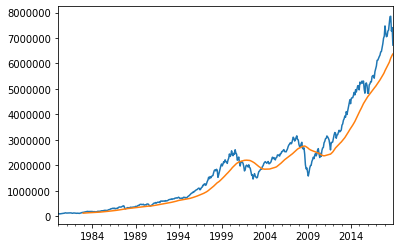

In [11]:
total_market_draw["1980":]["Wealth"].plot()
total_market_draw["1980":]["Wealth"].rolling(window=36).mean().plot()

Let's now plot the annualized returns for periods of 36 months. Again, we need to use rolling, but in this case we annualize the returns. Since we will annualize all the 36-period sets that are created with the rolling, we also need to use aggregate.

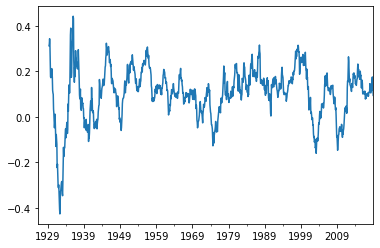

In [19]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualized_rets, periods_per_year=12)
tmi_tr36rets.plot(label="Trailing 36 months annualized return")



### Rolling Correlation

The code below returns the correlation between industries regardin their returns, but with rolling. As you can see, it returns the correlation for every month (remember that in every month we are actually using the trailing 36 months, that is why for the first 36 months we don't have correlations).



In [23]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr

Food      Beer     Smoke     Games     Books     Hshld  \
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
1926-07 Food        NaN       NaN       NaN       NaN  ...       NaN   
        Beer        NaN       NaN       NaN       NaN  ...       NaN   
        Smoke       NaN       NaN       NaN       NaN  ...       NaN   
        Games       NaN       NaN       NaN       NaN  ...       NaN   
        Books       NaN       NaN       NaN       NaN  ...       NaN   
...                 ...       ...       ...       ...  ...       ...   
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
1926-07 Food        NaN       NaN       NaN  
        Beer        NaN       NaN       NaN  
        Smoke       NaN       NaN       NaN  
        Games       NaN       NaN       NaN  
        Books       NaN       NaN       NaN  
...                 ...       ...       ...  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[33300 rows x 30 columns]

The DataFrame we have is new for us, as it is multi-index. We have one index for the data, and then we have a second index with all the industries. In order to work with them, we can name them doing the following:

In [25]:
ts_corr.index.names = ["date","industry"]
ts_corr

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
1926-07 Food           NaN       NaN       NaN       NaN       NaN       NaN   
        Beer           NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke          NaN       NaN       NaN       NaN       NaN       NaN   
        Games          NaN       NaN       NaN       NaN       NaN       NaN   
        Books          NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
1926-07 Food           NaN       NaN       NaN       NaN  ...       NaN   
        Beer           NaN       NaN       NaN       NaN  ...       NaN   
        Smoke          NaN       NaN       NaN       NaN  ...       NaN   
        Games          NaN       NaN       NaN       NaN  ...       NaN   
        Books          NaN       NaN       NaN       NaN  ...       NaN   
...                    ...       ...       ...       ...  ...       ...   
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
1926-07 Food           NaN       NaN       NaN       NaN       NaN       NaN   
        Beer           NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke          NaN       NaN       NaN       NaN       NaN       NaN   
        Games          NaN       NaN       NaN       NaN       NaN       NaN   
        Books          NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
1926-07 Food           NaN       NaN       NaN  
        Beer           NaN       NaN       NaN  
        Smoke          NaN       NaN       NaN  
        Games          NaN       NaN       NaN  
        Books          NaN       NaN       NaN  
...                    ...       ...       ...  
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[33300 rows x 30 columns]

What we want now is the average correlation of everything in each month, so what we can do is use the function groupby and then apply a lambda function to calculate the mean.

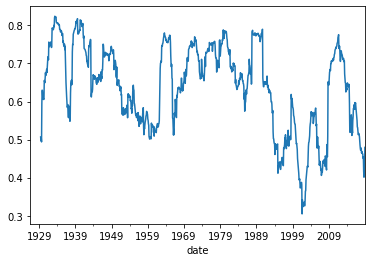

In [46]:
ind_tr36corr = ts_corr.groupby(level="date").apply(lambda cormat: cormat.values.mean())

ind_tr36corr.plot()


Now we can do something really fancy, which is plot both the return and correlation in the same figure. However, the y-axis is different in units (one is returns and another correlation), so what we will do is apply "secondary_y", which introduces a secondary axis. That way, we have to y-axis (one of the right and one on the left):

Text(0, 0.5, 'Return correlation')

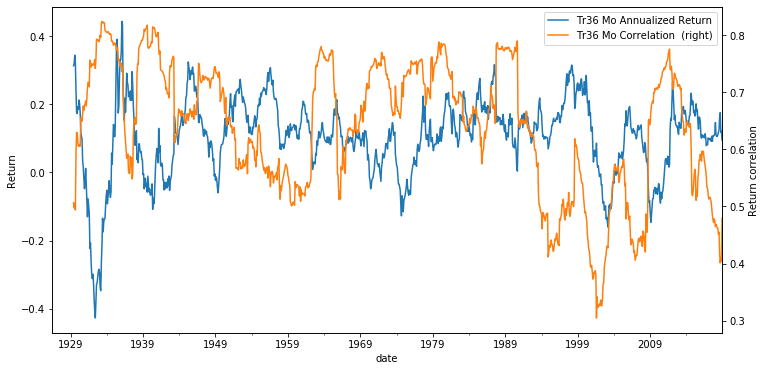

In [71]:
tmi_tr36rets.plot(figsize=(12,6),label="Tr36 Mo Annualized Return",legend=True)
plt.ylabel("Return")
ind_tr36corr.plot(label="Tr36 Mo Correlation ",legend=True,secondary_y=True) 
plt.ylabel("Return correlation")

#For some reason, secondary_y has to be second. Otherwise, the two lines on the legend will appear with the same color
# I don't know if the way I chose to label the axis is elegant, but it works fine.



This plot we have above is very important because it shows that diversification fails exactly when you need it the most. As you can see, when returns take a big hit, correlation spikes up. This means that no matter how you diversify, you will not be able to avoid the hit, as the market goes down as a whole. In essence, **diversification does not help  you when markets are crashing**. We can have a look at how the returns and average return correlation are correlated:

In [80]:
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884115

As you can see, the correlation is negative, which is essentially what we've already stated.